In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Optional, Tuple, List

# Data Wrangling  

The objective of this section is to clean the data and merge the two datasets in a consistent manner, leaving only the data of interest.

OC Dataset is an xlsx file composed by multiple pages.  
Extract the page of interest (data of 2023)

## Load Data

In [3]:
df_oc = pd.read_excel('Data/global_oc_index.xlsx', sheet_name=1)

In [4]:
df_oc

,Continent,Region,Country,"Criminality avg,","Criminal markets avg,",Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,International cooperation,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors
0,Asia,Southern Asia,Afghanistan,7.10,7.00,9.0,9.5,9.0,5.5,3.5,...,1.0,1.5,1.5,1.5,3.5,1.0,1.5,1.5,1.5,1.0
1,Africa,North Africa,Libya,6.93,6.57,8.5,9.5,9.0,1.0,3.5,...,2.5,2.0,1.5,1.5,1.5,1.0,2.0,1.0,1.0,1.5
2,Asia,South-Eastern Asia,Myanmar,8.15,7.70,8.5,8.0,9.0,8.5,8.5,...,2.0,2.0,1.5,1.5,2.0,2.0,1.5,1.0,1.5,1.5
3,Asia,Western Asia,Yemen,6.57,5.63,9.0,9.0,9.5,2.5,4.0,...,3.0,2.0,1.5,2.0,1.5,2.0,2.0,1.0,1.0,2.0
4,Africa,Central Africa,Central African Republic,6.75,5.60,7.5,5.5,9.0,7.0,8.0,...,3.0,2.0,2.0,1.5,1.5,2.0,1.5,2.5,1.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Asia,Eastern Asia,"Korea, Rep,",4.43,3.57,5.5,4.0,2.5,3.5,4.0,...,8.5,9.0,9.0,8.0,7.5,8.0,7.0,7.0,8.0,8.0
189,Europe,Northern Europe,Denmark,4.02,4.33,4.0,5.0,5.0,2.0,2.0,...,8.0,9.0,7.5,7.5,8.0,6.0,8.5,7.5,8.5,9.0
190,Europe,Northern Europe,Iceland,3.37,2.93,4.5,3.5,2.0,1.0,1.5,...,8.5,8.5,8.5,9.0,8.5,8.0,8.5,7.5,7.5,8.5
191,Europe,Western Europe,Liechtenstein,2.27,2.33,2.0,1.5,2.0,1.5,1.5,...,7.5,9.0,9.0,8.5,9.5,5.0,8.5,9.5,9.5,8.5


Now load WDI Dataset. 
Each row in this dataset contains the value of a single index for a state. Each column corresponds to the year to which the data refers.
Therefore, multiple rows refer to a single state.

In [5]:
df_wdi = pd.read_csv('Data/WDICSV.csv')

In [6]:
df_wdi

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.001597,18.558234,19.043572,19.586457,20.192064,20.828814,21.372164,22.100884,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.096003,7.406706,7.666648,8.020952,8.403358,8.718306,9.097176,9.473374,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.488233,38.779953,39.068462,39.445526,39.818645,40.276374,40.687817,41.211606,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,33.922276,38.859598,40.223744,43.035073,44.390861,46.282371,48.127211,48.801258,50.668330,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.527554,24.627753,25.432092,27.061929,29.154282,31.022083,32.809138,33.783960,35.375216,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403251,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403252,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.700000,NaN,NaN,NaN,5.400000,NaN,NaN,NaN,NaN,NaN
403253,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.400000,NaN,NaN,NaN,33.700000,NaN,NaN,NaN,NaN,NaN
403254,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.687901,58.916636,59.131787,59.318579,59.495248,59.675019,59.832577,59.955283,60.053675,60.155308


In [7]:
# filter only column relative to 2023
filter_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2023']
df_wdi = df_wdi[filter_columns]

In [8]:
df_wdi

,Country Name,Country Code,Indicator Name,Indicator Code,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,50.668330
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,35.375216
...,...,...,...,...,...
403251,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN
403252,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN
403253,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN
403254,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,60.053675


## Feature Engineering

The WDI dataset also contains data on groups of countries (such as African Eastern and Southern).  
Let's remove them, keeping only the data for individual countries via the OC dataset column.

In [9]:
# These States'names are different between the two dataset. This is the mapping to fix it
COUNTRY_NAME_MAPPING = {
    'Bahamas, The': 'Bahamas',
    'Brunei Darussalam': 'Brunei',
    'Czechia': 'Czech Republic',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'Egypt, Arab Rep.': 'Egypt',
    'Eswatini': 'eSwatini',
    'Gambia, The': 'Gambia',
    'Iran, Islamic Rep.': 'Iran',
    "Korea, Dem. People's Rep.": 'Korea, DPR',
    'Korea, Rep.': 'Korea, Rep,',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Micronesia, Fed. Sts.': 'Micronesia (Federated States of)',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Somalia, Fed. Rep.': 'Somalia',
    'St. Kitts and Nevis': 'St, Kitts and Nevis',
    'St. Lucia': 'St, Lucia',
    'St. Vincent and the Grenadines': 'St, Vincent and the Grenadines',
    'Syrian Arab Republic': 'Syria',
    'Turkiye': 'Turkey',
    'Venezuela, RB': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Yemen, Rep.': 'Yemen',
    'Congo, Dem. Rep.': 'Congo, Dem, Rep,',
    'Congo, Rep.': 'Congo, Rep,',
}

In [10]:
oc_countries = df_oc['Country'].tolist()

In [11]:
df_wdi['Country_standardized'] = df_wdi['Country Name'].replace(COUNTRY_NAME_MAPPING)

/tmp/ipykernel_5538/4039106864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wdi['Country_standardized'] = df_wdi['Country Name'].replace(COUNTRY_NAME_MAPPING)


In [12]:
# Hold only rows with countries in OC Index
oc_countries_set = set(oc_countries)
df_wdi_filtered = df_wdi[df_wdi['Country_standardized'].isin(oc_countries_set)].copy()

In [13]:
df_wdi_filtered

,Country Name,Country Code,Indicator Name,Indicator Code,2023,Country_standardized
74284,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,Afghanistan
74285,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,Afghanistan
74286,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,Afghanistan
74287,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,85.300000,Afghanistan
74288,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,81.400000,Afghanistan
...,...,...,...,...,...,...
403251,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,Zimbabwe
403252,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,Zimbabwe
403253,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,Zimbabwe
403254,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,60.053675,Zimbabwe


WDI Dataset contains a great many indicators. I select those that could be most relevant for this project.

In [14]:
df_wdi_filtered['Indicator Code'].value_counts()

Indicator Code
EG.CFT.ACCS.ZS       193
EG.CFT.ACCS.RU.ZS    193
EG.CFT.ACCS.UR.ZS    193
EG.ELC.ACCS.ZS       193
EG.ELC.ACCS.RU.ZS    193
                    ... 
SG.VAW.REFU.ZS       193
SP.M15.2024.FE.ZS    193
SP.M18.2024.FE.ZS    193
SH.DYN.AIDS.FE.ZS    193
SH.HIV.INCD.YG       193
Name: count, Length: 1516, dtype: int64

In [15]:
# Factors like low PIL, youth unemployment or income inequality (GINI index) could be correlated to higher crime presence in a country
economic_indicators = [
    'NY.GDP.PCAP.CD',           # GDP per capita (current US$)
    'NY.GDP.MKTP.KD.ZG',        # GDP growth (annual %)
    'SL.UEM.TOTL.ZS',           # Unemployment, total (% of labor force)
    'SL.UEM.1524.ZS',           # Youth unemployment (ages 15-24, %)
    'SI.POV.GINI',              # Gini index (income inequality)
    'FP.CPI.TOTL.ZG',           # Inflation, consumer prices (annual %)
    'NE.TRD.GNFS.ZS',           # Trade (% of GDP)
]

# Low education and school dropout could push to get involved in crime
education_indicators = [
    'SE.XPD.TOTL.GD.ZS',        # Government expenditure on education (% of GDP)
    'SE.PRM.NENR',              # School enrollment, primary (% net)
    'SE.SEC.ENRR',              # School enrollment, secondary (% gross)
    'SE.ADT.LITR.ZS',           # Literacy rate, adult total (% of people ages 15+)
]

# Weak healtcare systems can create illegal market for drug/organs. Or large young population could indicate more potential recruits
health_indicators = [
    'SP.DYN.LE00.IN',           # Life expectancy at birth (years)
    'SH.XPD.CHEX.GD.ZS',        # Current health expenditure (% of GDP)
    'SP.POP.TOTL',              # Population, total
    'SP.URB.TOTL.IN.ZS',        # Urban population (% of total)
    'SP.POP.1564.TO.ZS',        # Population ages 15-64 (% of total) - working age
]

# These could be the most important, indicating high corruption, weak rule of law or politic instability: each one is a determinant factor in the proliferation of organized crime 
governance_indicators = [
    'CC.EST',                   # Control of Corruption (estimate)
    'GE.EST',                   # Government Effectiveness (estimate)
    'PV.EST',                   # Political Stability and Absence of Violence (estimate)
    'RL.EST',                   # Rule of Law (estimate)
    'RQ.EST',                   # Regulatory Quality (estimate)
    'VA.EST',                   # Voice and Accountability (estimate)
]


# a weak banking system or complex regulations could increase money laundering or corruption
business_indicators = [
    
    'FB.AST.NPER.ZS',           # Bank nonperforming loans (% of total loans)
    'CM.MKT.LCAP.GD.ZS',        # Market capitalization (% of GDP)
]

In [16]:
ALL_INDICATORS = [economic_indicators, education_indicators, health_indicators, governance_indicators, business_indicators]

Let's start by selecting all these indicators. We'll see later how much they influence the importance

In [17]:
INDICATORS = []

for l in ALL_INDICATORS:
    for i in l:
        INDICATORS.append(i)


In [18]:
def select_wdi_indicators(df_wdi: pd.DataFrame, indicator_codes) -> pd.DataFrame:
    """ 
    Function to filter wdi dataset indexes
    """
    
    df_filtered = df_wdi[df_wdi['Indicator Code'].isin(indicator_codes)].copy()
    
    found = set(df_filtered['Indicator Code'].unique())
    missing = set(indicator_codes) - found
    if missing: 
        print(f'\n Indicator not found in WDI:')
        for code in missing:
            print(f"    {code}")
    
    return df_filtered
       
    

In [19]:
df_wdi_selected = select_wdi_indicators(df_wdi_filtered, indicator_codes=INDICATORS)

In [20]:
del df_wdi_selected['Country Name']
del df_wdi_selected['Country Code']

In [21]:
df_wdi_selected.columns


Index(['Indicator Name', 'Indicator Code', '2023', 'Country_standardized'], dtype='object')

In [22]:
col = "Country_standardized"
cols = [col] + [c for c in df_wdi_selected.columns if c != col]
df_wdi_selected = df_wdi_selected[cols]

In [23]:
df_wdi_selected

,Country_standardized,Indicator Name,Indicator Code,2023
74393,Afghanistan,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,NaN
74560,Afghanistan,Control of Corruption: Estimate,CC.EST,-1.154932
74612,Afghanistan,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN
74802,Afghanistan,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.266944
74806,Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,413.757895
...,...,...,...,...
403165,Zimbabwe,Trade (% of GDP),NE.TRD.GNFS.ZS,50.794964
403208,Zimbabwe,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.759000
403214,Zimbabwe,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,14.481000
403221,Zimbabwe,Urban population (% of total population),SP.URB.TOTL.IN.ZS,32.517000


Pivot the wdi dataframe, to have a country for each row

In [24]:
df_wdi_pivoted = df_wdi_selected.pivot(index = 'Country_standardized', columns = 'Indicator Name', values = '2023')

Check if there are null values

In [25]:
df_wdi_pivoted.isna().sum()

Indicator Name
Bank nonperforming loans to total gross loans (%)                                        93
Control of Corruption: Estimate                                                           0
Current health expenditure (% of GDP)                                                   172
GDP growth (annual %)                                                                     7
GDP per capita (current US$)                                                              8
Gini index                                                                              141
Government Effectiveness: Estimate                                                        0
Government expenditure on education, total (% of GDP)                                    81
Inflation, consumer prices (annual %)                                                    24
Life expectancy at birth, total (years)                                                   0
Literacy rate, adult total (% of people ages 15 and above)       

In [26]:
n_countries: int = len(df_wdi_pivoted)

# Compute missing for each indicator
missing_counts: pd.Series = df_wdi_pivoted.isnull().sum()
missing_pct = ((missing_counts/n_countries)*100).round(2)
print(type(missing_pct))    

<class 'pandas.core.series.Series'>


## Handling missing values

In [27]:
def analyze_missing_by_indicator(df: pd.DataFrame, threshold: float = 0.40) -> Optional[Tuple[pd.DataFrame, List, List]]:
    """Analize missing values for each indicator

    Args:
        df (pd.DataFrame): Pivoted df
        threshold (float, optional): Threshold for drop or not. Defaults to 0.40.

    Returns:
        Optional[Tuple[pd.DataFrame, List, List]]: Dataframe with report of missing values for each indicator, List of indicator to keep, List of indicator to drop
    """
    n_countries: int = len(df)
    
    # Compute missing for each indicator
    missing_counts: pd.Series = df.isnull().sum()
    missing_pct: pd.Series = ((missing_counts/n_countries)*100).round(2)
    
    # Create report
    report: pd.DataFrame = pd.DataFrame({
        'indicator': missing_counts.index, 
        'missing_count': missing_counts.values,
        'missing_pct':  missing_pct,
        'available_count': n_countries - missing_counts.values, 
        'available_pct': (100 - missing_pct.values).round(2)
    }).sort_values('missing_pct', ascending=False)
    
    indicators_to_drop: List = report[report['missing_pct'] > threshold*100]['indicator'].tolist()
    indicators_to_keep: List = report[report['missing_pct'] <= threshold*100]['indicator'].tolist()
    
    # print report
    print('='*50)
    print('Missing values analysis by indicator')
    print('='*50)
    print(f"Elimination Threshold: {threshold*100}%")
    print(f"Number of countries: {n_countries}")    
    print(f"Number of total indicators: {len(df.columns)}")
    
    print(f"Indicators to keep: {len(indicators_to_keep)}")
    print(f"Missing <= {threshold*100}%")
    for _, row in report[report['missing_pct'] <= threshold * 100].iterrows():
        print(f"    ++ {row['indicator'][:50]:50s} - {row['missing_pct']:5.1f}% Missing ({row['available_count']}/{n_countries} countries)" ) 
    
    print(f"Indicators to drop ({len(indicators_to_drop)})")
    print(f"Missing > {threshold*100}%")
    for _, row in report[report['missing_pct'] > threshold * 100].iterrows():
        print(f"    ++ {row['indicator'][:50]:50s} - {row['missing_pct']:5.1f}% Missing ({row['available_count']}/{n_countries} countries)" ) 
        
    print('='*50)
    
    return report, indicators_to_keep, indicators_to_drop
    
    
        

In [28]:
def analyze_missing_by_country(df: pd.DataFrame, indicators_to_keep: List) -> pd.DataFrame: 
    """Analize missing values for each country

    Args:
        df (pd.DataFrame): Pivoted df
        indicators_to_keep (List): Indicators to keep from 'analyze_missing_by_indicator'

    Returns:
        report (pd.DataFrame): dataframe with statistics for each country
    """
    # Filter only valid indicators
    df_filtered = df[indicators_to_keep].copy()
    n_indicators = len(indicators_to_keep)
    
    # Compute missing per country
    missing_counts: pd.Series = df_filtered.isnull().sum(axis=1)
    missing_pct: pd.Series = (missing_counts/n_indicators % 100).round(2)
    
    # Generate Report df
    report = pd.DataFrame({
        'country': df_filtered.index, 
        'missing_count': missing_counts.values, 
        'missing_pct': missing_pct.values,
        'available_count': n_indicators - missing_counts.values,
        'available_pct': (100 - missing_pct.values).round(2)
    }).sort_values('missing_pct', ascending=False)
    
    # print report
    print('='*50)
    print('Missing values analysis by country')
    print('='*50)
    print(f"Number of considered indicators: {n_indicators}")
    print(f"Number of countries: {len(df_filtered)}")    

    print('Summary statistics')
    print(f"    Average missing for each country: {missing_pct.mean():.1f}%")
    print(f"    Median missing for each country: {missing_pct.median():.1f}%")
    print(f"    Max missing for each country: {missing_pct.max():.1f}%")
    print(f"    Min missing for each country: {missing_pct.min():.1f}%")

    # Top 10 countries with more missing
    print(f"Top 10 countries with more missing")
    for _, row in report.head(10).iterrows():
        print(f"    ++ {row['country']:35s} - {row['missing_pct']:5.1f}% missing ({row['available_count']}/{n_indicators} indicators)")
    
    # Top 10 countries with less missing
    print(f"Top 10 countries with less missing")
    for _, row in report.tail(10).iterrows():
        print(f"    ++ {row['country']:35s} - {row['missing_pct']:5.1f}% missing ({row['available_count']}/{n_indicators} indicators)")
        
    print('='*50)
    
    return report

In [29]:
_, indicators_to_keep, _ = analyze_missing_by_indicator(df_wdi_pivoted,)
analyze_missing_by_country(df_wdi_pivoted, indicators_to_keep)

Missing values analysis by indicator
Elimination Threshold: 40.0%
Number of countries: 193
Number of total indicators: 24
Indicators to keep: 17
Missing <= 40.0%
    ++ School enrollment, secondary (% gross)             -  31.1% Missing (133/193 countries)
    ++ Trade (% of GDP)                                   -  17.6% Missing (159/193 countries)
    ++ Inflation, consumer prices (annual %)              -  12.4% Missing (169/193 countries)
    ++ Unemployment, total (% of total labor force) (mode -   8.8% Missing (176/193 countries)
    ++ Unemployment, youth total (% of total labor force  -   8.8% Missing (176/193 countries)
    ++ GDP per capita (current US$)                       -   4.2% Missing (185/193 countries)
    ++ GDP growth (annual %)                              -   3.6% Missing (186/193 countries)
    ++ Government Effectiveness: Estimate                 -   0.0% Missing (193/193 countries)
    ++ Control of Corruption: Estimate                    -   0.0% Missing (19

,country,missing_count,missing_pct,available_count,available_pct
98,Liechtenstein,6,0.35,11,99.65
144,San Marino,5,0.29,12,99.71
113,Monaco,5,0.29,12,99.71
88,"Korea, DPR",5,0.29,12,99.71
189,Yemen,5,0.29,12,99.71
...,...,...,...,...,...
165,Sweden,0,0.00,17,100.00
184,Uruguay,0,0.00,17,100.00
182,United Kingdom,0,0.00,17,100.00
181,United Arab Emirates,0,0.00,17,100.00


In [30]:
def plot_missing_analysis(df: pd.DataFrame, indicator_report: pd.DataFrame, country_report, save_path: str = None):
    """Creates visualizations for missing value analysis
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle('Missing Value Analysis', fontsize=16, fontweight='bold')
    
    # Bar chart for missing indicators
    ax1 = axes[0]
    top_missing_indicators = indicator_report.nlargest(15, 'missing_pct')
    ax1.barh(range(len(top_missing_indicators)), top_missing_indicators['missing_pct'])
    ax1.set_yticks(range(len(top_missing_indicators)))
    ax1.set_yticklabels([ind[:40] for ind in top_missing_indicators['indicator']], fontsize=8)
    ax1.set_xlabel('Missing %')
    ax1.set_title('Top 15 indicators with most missing values')
    ax1.axvline(x=40, color='red', linestyle='--', label = '40% threshold')
    ax1.legend()
    ax1.invert_yaxis()
    
    # Histogram missing % per country
    ax2 = axes[1]
    ax2.hist(country_report['missing_pct'], bins=10, edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Missing % per country')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of missing values across countries')
    ax2.axvline(x=country_report['missing_pct'].mean(), color='red', linestyle='--', label = f'Mean: {country_report['missing_pct'].mean():.1f}%')
    ax2.legend()
    
    # # Scatter of countries with most missing
    # ax3 = axes[1,0]
    # top_20_countries = country_report.nlargest(20, 'missing_pct')
    # ax3.scatter(range(len(top_20_countries)), top_20_countries['missing_pct'], s = 100, alpha = 0.6, 
    #             c = top_20_countries['missing_pct'], cmap='Reds')
    # ax3.set_xticks(range(len(top_20_countries)))
    # ax3.set_xticklabels([c[:15] for c in top_20_countries['country']], rotation = 45, ha = 'right', fontsize = 8)
    # ax3.set_ylabel('Missing %')
    # ax3.set_title('Top 20 countries with most missing values')
    # ax3.grid(True, alpha=0.3)
    
    # # Heatmap
    # ax4 = axes[1,1]
    # sample_countries = country_report.nlargest(10, 'missing_pct')['country'].tolist()
    # sample_indicators = indicator_report.nlargest(10, 'missing_pct')['indicator'].tolist()
    # df_sample = df.loc[sample_countries, sample_indicators]
    # mask = df_sample.isnull()
    
    # sns.heatmap(mask, cmap = 'RdYlGn_r', cbar_kws={'label': 'Missing (1=Yes, 0=No)'},
    #             ax=ax4, yticklabels=[c[:20] for c in sample_countries],
    #             xticklabels=[i[:20] for i in sample_indicators]
    #             )        
    # ax4.set_title('Missing Value Heatmap (Top 10 countries * Top 10 indicators)')
    # plt.setp(ax4.get_xticklabels(), rotation = 45, ha ='right', fontsize=7)
    # plt.setp(ax4.get_yticklabels(), fontsize=7)
    # plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches = 'tight')
        print(f"\n Viz saved in {save_path}")
    plt.show()
    
    

In [31]:
def clean_dataset(df: pd.DataFrame, indicators_to_keep: List, country_threshold: float = None) -> tuple[pd.DataFrame, dict]:
    """_summary_

    Args:
        df (pd.DataFrame): Original Df
        indicators_to_keep (List): List indicators to keep
        country_threshold (float, optional): If defined, it removes countring with missing > threshold %. Defaults to None.

    Returns:
        _type_: _description_
    """
    df_clean = df[indicators_to_keep].copy()
    
    # Optional: Remove countries with too many missing
    if country_threshold:
        missing_pct = df_clean.isnull().sum(axis=1)/len(indicators_to_keep) * 100
        countries_to_keep = missing_pct[missing_pct <= country_threshold].index
        df_clean = df_clean.loc[countries_to_keep]
        
    # report
    report = {
        'original_shape': df.shape,
        'clean_shape': df_clean.shape, 
        'indicators_removed': len(df.columns) - len(indicators_to_keep),
        'countries_removed': len(df) - len(df_clean),
        'total_cells_original': df.shape[0] * df.shape[1],
        'total_cells_clean': df_clean.shape[0] * df_clean.shape[1],
        'missing_cells_original': int(df.isnull().sum().sum()),
        'missing_cells_clean': int(df_clean.isnull().sum().sum()),
        'missing_pct_original': round(float((df.isnull().sum().sum() / (df.shape[0]*df.shape[1]) *100)),2),
        'missing_pct_clean': round(float((df_clean.isnull().sum().sum() / (df_clean.shape[0]*df_clean.shape[1]) *100)),2)
    }
    
    print("\n" + "="*50)
    print("CLEANING REPORT")
    print("="*50)
    print(f"Original Shape: {report['original_shape']}")
    print(f"Clean shape: {report['clean_shape']}")
    print(f"Indicators Removed: {report['indicators_removed']}")
    print(f"Countries Removed: {report['countries_removed']}")
    print(f"\nMissing values:")
    print(f"    Before: {report['missing_cells_original']:,} cells ({report['missing_pct_original']:.2f}%)")
    print(f"    After: {report['missing_cells_clean']:,} cells ({report['missing_pct_clean']:.2f}%)")
    print("="*50)
    
    return df_clean, report

In [32]:
indicator_report, indicators_to_keep, indicators_to_drop = analyze_missing_by_indicator(df_wdi_pivoted)

Missing values analysis by indicator
Elimination Threshold: 40.0%
Number of countries: 193
Number of total indicators: 24
Indicators to keep: 17
Missing <= 40.0%
    ++ School enrollment, secondary (% gross)             -  31.1% Missing (133/193 countries)
    ++ Trade (% of GDP)                                   -  17.6% Missing (159/193 countries)
    ++ Inflation, consumer prices (annual %)              -  12.4% Missing (169/193 countries)
    ++ Unemployment, total (% of total labor force) (mode -   8.8% Missing (176/193 countries)
    ++ Unemployment, youth total (% of total labor force  -   8.8% Missing (176/193 countries)
    ++ GDP per capita (current US$)                       -   4.2% Missing (185/193 countries)
    ++ GDP growth (annual %)                              -   3.6% Missing (186/193 countries)
    ++ Government Effectiveness: Estimate                 -   0.0% Missing (193/193 countries)
    ++ Control of Corruption: Estimate                    -   0.0% Missing (19

In [33]:
country_report = analyze_missing_by_country(df_wdi_pivoted, indicators_to_keep)

Missing values analysis by country
Number of considered indicators: 17
Number of countries: 193
Summary statistics
    Average missing for each country: 0.1%
    Median missing for each country: 0.0%
    Max missing for each country: 0.3%
    Min missing for each country: 0.0%
Top 10 countries with more missing
    ++ Liechtenstein                       -   0.3% missing (11/17 indicators)
    ++ San Marino                          -   0.3% missing (12/17 indicators)
    ++ Monaco                              -   0.3% missing (12/17 indicators)
    ++ Korea, DPR                          -   0.3% missing (12/17 indicators)
    ++ Yemen                               -   0.3% missing (12/17 indicators)
    ++ Eritrea                             -   0.3% missing (12/17 indicators)
    ++ Andorra                             -   0.2% missing (13/17 indicators)
    ++ Sudan                               -   0.2% missing (13/17 indicators)
    ++ Micronesia (Federated States of)    -   0.2% mis


 Viz saved in graph.png


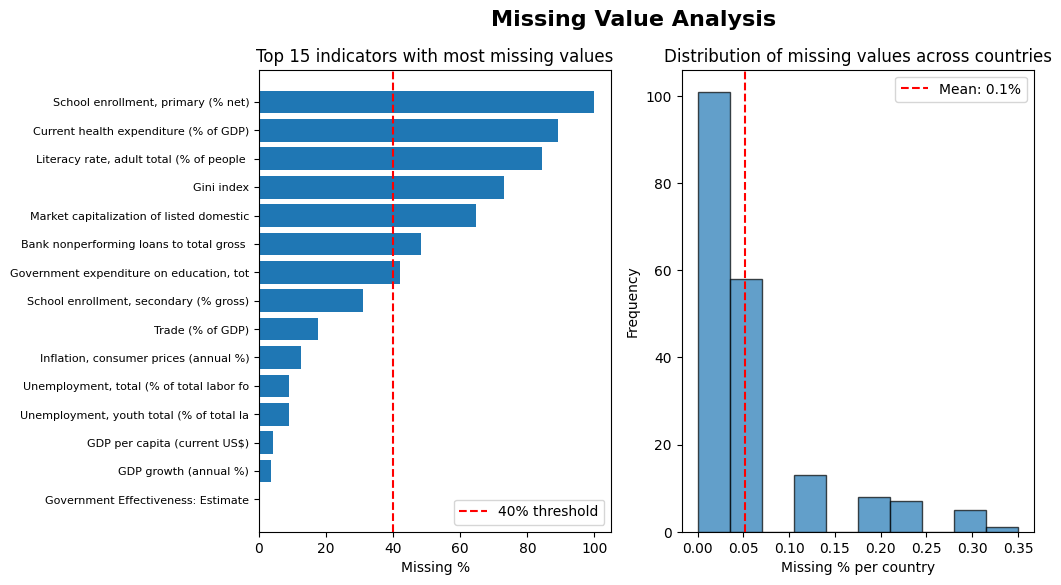

In [34]:
plot_missing_analysis(df_wdi_pivoted, indicator_report, country_report, save_path='graph.png')

In [35]:
df_wdi_clean, cleaning_report = clean_dataset(df_wdi_pivoted, indicators_to_keep)


CLEANING REPORT
Original Shape: (193, 24)
Clean shape: (193, 17)
Indicators Removed: 7
Countries Removed: 0

Missing values:
    Before: 1,135 cells (24.50%)
    After: 167 cells (5.09%)


In [36]:
cleaning_report

{'original_shape': (193, 24),
 'clean_shape': (193, 17),
 'indicators_removed': 7,
 'countries_removed': 0,
 'total_cells_original': 4632,
 'total_cells_clean': 3281,
 'missing_cells_original': 1135,
 'missing_cells_clean': 167,
 'missing_pct_original': 24.5,
 'missing_pct_clean': 5.09}

In this way, we have removed indicators with too many null values, but there are still several ones.  
I decided that the best way to fill them in is to use the mean based on countries belonging to the same continent as the country with null values. In this way, we give a more specific estimate that does not deviate too much from reality (e.g, the average GDP of African countries is different from that of European ones)


In [37]:
# OC dataset already has the continent column, so map each state to its continent
country_to_continent = df_oc.set_index('Country')['Continent'].to_dict()

In [38]:
df_wdi_clean['continent'] = df_wdi_clean.index.map(country_to_continent) 

In [39]:
df_wdi_clean

Indicator Name,"School enrollment, secondary (% gross)",Trade (% of GDP),"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",GDP per capita (current US$),GDP growth (annual %),Government Effectiveness: Estimate,Control of Corruption: Estimate,Regulatory Quality: Estimate,"Population, total",Population ages 15-64 (% of total population),Political Stability and Absence of Violence/Terrorism: Estimate,"Life expectancy at birth, total (years)",Rule of Law: Estimate,Urban population (% of total population),Voice and Accountability: Estimate,continent
Country_standardized,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,67.584665,-4.644709,13.991,17.291,413.757895,2.266944,-1.987014,-1.154932,-1.266425,41454761.0,54.396259,-2.484081,66.035,-1.649641,26.933,-1.852901,Asia
Albania,96.136877,82.493683,4.759764,10.108,24.817,8575.171346,3.936617,0.250855,-0.332219,0.171954,2745972.0,66.656026,0.183349,79.602,-0.164097,64.603,0.168997,Europe
Algeria,101.264893,43.682914,9.322174,11.701,30.447,5364.027950,4.100000,-0.670135,-0.589308,-0.948087,46164219.0,62.983794,-0.577885,76.261,-0.678364,75.268,-0.979884,Africa
Andorra,99.508652,NaN,NaN,NaN,NaN,46812.448449,2.583555,1.475439,1.251356,1.350546,80856.0,72.334150,1.583466,84.041,1.476899,87.774,0.996940,Europe
Angola,51.483905,67.001793,13.644102,14.537,28.075,2309.534130,1.078100,-1.008910,-0.609920,-0.761388,36749906.0,52.616286,-0.341505,64.617,-1.099066,68.688,-0.737252,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,NaN,164.818071,3.252893,1.645,6.345,4323.350320,5.065024,0.126467,-0.415814,-0.382608,100352192.0,67.772987,-0.036381,74.588,-0.085472,39.480,-1.241854,Asia
Yemen,NaN,NaN,NaN,17.091,32.395,NaN,NaN,-2.275420,-1.648933,-1.843051,39390799.0,56.266358,-2.562939,69.295,-1.838976,39.831,-1.550217,Asia
Zambia,NaN,78.241887,10.884532,5.905,9.752,1330.727806,5.367943,-0.658970,-0.477707,-0.498100,20723965.0,56.146027,0.201727,66.349,-0.529127,46.335,-0.047946,Africa


In [40]:
# move continent to first column
col = 'continent'
df_wdi_clean= df_wdi_clean[[col] + [c for c in df_wdi_clean.columns if c != col]] 

In [41]:
missing_summary = df_wdi_clean.isnull().sum()
missing_summary = missing_summary[missing_summary > 0 ]
missing_summary = missing_summary.drop('continent', errors='ignore')

In [42]:
if len(missing_summary) >0:
    for col in missing_summary.index:
        total_missing = df_wdi_clean[col].isnull().sum()
        print(f"\n+ {col[:60]:60s}")
        print(f'Total missing: {total_missing} ({total_missing/len(df_wdi_clean)*100:.1f}%)')
        
        # Fill null for each continent
        for continent in df_wdi_clean['continent'].unique():
            if pd.isnull(continent):
                continue
            # select countries in the continent
            continent_mask = df_wdi_clean['continent'] == continent
            # count missing values in this continent
            missing_in_continent = df_wdi_clean.loc[continent_mask, col].isnull().sum()
            
            if missing_in_continent > 0:
                # compute continent mead
                continent_mean = df_wdi_clean.loc[continent_mask, col].mean()
                
                # If all the countries of a continent are missing, use global mean
                if pd.isnull(continent_mean):
                    continent_mean = df_wdi_clean[col].mean()
                    print(f"    {continent:20s}: {missing_in_continent:2d} missing → Global mean = {continent_mean:.2f}")
                else:
                    print(f"    {continent:20s}: {missing_in_continent:2d} missing → Continent mean = {continent_mean:.2f}")
                
                # fillna in the df
                df_wdi_clean.loc[continent_mask, col] = df_wdi_clean.loc[continent_mask, col].fillna(continent_mean)
                
        # verify no more missing values
        remaining = df_wdi_clean[col].isnull().sum()            
        if remaining > 0:
            print(f"  !!{remaining} missing values → Use global mean ")
            global_mean = df_wdi_clean[col].mean()
            df_wdi_clean[col].fillna(global_mean, inplace=True)        
        
    # final verify
    total_missing_after = df_wdi_clean[missing_summary.index].isnull().sum().sum()
    assert total_missing_after == 0, f"STILL {total_missing_after} MISSING!!"
    print(f"Sustitution completed: 0 missing values")
else:
    print(f"Sustitution completed: 0 missing values")
    


+ School enrollment, secondary (% gross)                      
Total missing: 60 (31.1%)
    Asia                : 14 missing → Continent mean = 85.96
    Europe              :  5 missing → Continent mean = 105.52
    Africa              : 32 missing → Continent mean = 57.98
    Americas            :  6 missing → Continent mean = 93.76
    Oceania             :  3 missing → Continent mean = 99.06

+ Trade (% of GDP)                                            
Total missing: 34 (17.6%)
    Asia                :  7 missing → Continent mean = 93.91
    Europe              :  4 missing → Continent mean = 127.10
    Africa              :  6 missing → Continent mean = 74.52
    Americas            : 12 missing → Continent mean = 64.95
    Oceania             :  5 missing → Continent mean = 96.73

+ Inflation, consumer prices (annual %)                       
Total missing: 24 (12.4%)
    Asia                :  6 missing → Continent mean = 13.79
    Europe              :  4 missing → Contine

## Merging Datasets

In [66]:
df_oc = df_oc.reset_index()

In [ ]:
df_merged = df_wdi_clean.merge(df_oc, left_on='Country_standardized', right_on = 'Country', how='left', validate='one_to_one')

In [71]:
col = 'Country'
df_merged= df_merged[[col] + [c for c in df_merged.columns if c != col]] 

In [75]:
del df_merged['Continent']

In [76]:
df_merged

,Country,continent,"School enrollment, secondary (% gross)",Trade (% of GDP),"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",GDP per capita (current US$),GDP growth (annual %),Government Effectiveness: Estimate,...,International cooperation,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors
0,Afghanistan,Asia,85.963534,67.584665,-4.644709,13.991000,17.291000,413.757895,2.266944,-1.987014,...,1.0,1.5,1.5,1.5,3.5,1.0,1.5,1.5,1.5,1.0
1,Albania,Europe,96.136877,82.493683,4.759764,10.108000,24.817000,8575.171346,3.936617,0.250855,...,7.0,6.0,6.0,5.0,5.5,4.0,4.0,4.5,5.0,5.0
2,Algeria,Africa,101.264893,43.682914,9.322174,11.701000,30.447000,5364.027950,4.100000,-0.670135,...,5.0,6.0,3.0,6.0,6.5,5.0,4.5,3.0,3.5,2.5
3,Andorra,Europe,99.508652,127.102253,7.352342,6.033231,15.800513,46812.448449,2.583555,1.475439,...,8.5,8.5,8.0,8.5,7.5,7.0,8.0,8.5,8.5,8.0
4,Angola,Africa,51.483905,67.001793,13.644102,14.537000,28.075000,2309.534130,1.078100,-1.008910,...,5.0,5.0,3.5,4.5,5.5,5.0,4.5,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Vietnam,Asia,85.963534,164.818071,3.252893,1.645000,6.345000,4323.350320,5.065024,0.126467,...,6.0,6.0,4.0,4.5,5.5,5.5,5.5,4.5,5.0,1.5
189,Yemen,Asia,85.963534,93.906631,13.788543,17.091000,32.395000,14913.287487,3.011816,-2.275420,...,3.0,2.0,1.5,2.0,1.5,2.0,2.0,1.0,1.0,2.0
190,Zambia,Africa,57.977732,78.241887,10.884532,5.905000,9.752000,1330.727806,5.367943,-0.658970,...,5.5,6.5,5.0,4.0,3.5,5.5,5.5,3.0,3.0,5.0
191,Zimbabwe,Africa,57.977732,50.794964,10.803836,8.759000,14.481000,2156.034093,5.336770,-1.170335,...,3.5,3.5,2.5,3.0,4.5,4.0,3.0,2.0,3.5,3.0


In [77]:
# ============================================================
# INFO DATASET MERGED
# ============================================================

print("="*80)
print("📊 DATASET MERGED - OVERVIEW")
print("="*80)

# 1. Info generali
print(f"\n1️⃣ INFO GENERALI:")
print(f"   Shape: {df_merged.shape}")
print(f"   Paesi: {len(df_merged)}")
print(f"   Colonne totali: {len(df_merged.columns)}")
print(f"   Missing values: {df_merged.isnull().sum().sum()}")

# 2. Colonne (primi/ultimi)
print(f"\n2️⃣ COLONNE (prime 10 e ultime 10):")
print(f"   Prime 10:")
for i, col in enumerate(df_merged.columns[:10], 1):
    print(f"      {i:2d}. {col}")
print(f"   ...")
print(f"   Ultime 10:")
for i, col in enumerate(df_merged.columns[-10:], len(df_merged.columns)-9):
    print(f"      {i:2d}. {col}")

# 3. Target variable
print(f"\n3️⃣ TARGET VARIABLE:")
target_cols = [c for c in df_merged.columns if 'criminality avg,' in c.lower()]
print(f"   Colonne con 'criminal': {len(target_cols)}")
for col in target_cols[:5]:  # prime 5
    print(f"      • {col}")

# 4. Feature WDI
print(f"\n4️⃣ FEATURE WDI:")
wdi_indicators = [c for c in df_merged.columns if any(x in c for x in 
    ['GDP', 'unemployment', 'life expectancy', 'population', 'Control of', 'Rule of'])]
print(f"   Indicatori WDI identificati: {len(wdi_indicators)}")
for ind in wdi_indicators[:5]:
    print(f"      • {ind}")

# 5. Primi 3 paesi con tutti i dati
print(f"\n5️⃣ SAMPLE DATA (primi 3 paesi):")
print(df_merged.head(3)[['Country', 'continent', 'Criminality avg,']].to_string())

# 6. Statistiche target
print(f"\n6️⃣ STATISTICHE TARGET (Criminality avg):")
if 'Criminality avg,' in df_merged.columns:
    print(f"   Mean:   {df_merged['Criminality avg,'].mean():.3f}")
    print(f"   Median: {df_merged['Criminality avg,'].median():.3f}")
    print(f"   Std:    {df_merged['Criminality avg,'].std():.3f}")
    print(f"   Min:    {df_merged['Criminality avg,'].min():.3f}")
    print(f"   Max:    {df_merged['Criminality avg,'].max():.3f}")
else:
    print(f"   ⚠️ Colonna 'Criminality avg,' non trovata")
    print(f"   Target alternatives: {[c for c in df_merged.columns if 'avg' in c.lower()]}")

print("\n" + "="*80)

📊 DATASET MERGED - OVERVIEW

1️⃣ INFO GENERALI:
   Shape: (193, 56)
   Paesi: 193
   Colonne totali: 56
   Missing values: 0

2️⃣ COLONNE (prime 10 e ultime 10):
   Prime 10:
       1. Country
       2. continent
       3. School enrollment, secondary (% gross)
       4. Trade (% of GDP)
       5. Inflation, consumer prices (annual %)
       6. Unemployment, total (% of total labor force) (modeled ILO estimate)
       7. Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)
       8. GDP per capita (current US$)
       9. GDP growth (annual %)
      10. Government Effectiveness: Estimate
   ...
   Ultime 10:
      47. International cooperation
      48. National policies and laws
      49. Judicial system and detention
      50. Law enforcement
      51. Territorial integrity
      52. Anti-money laundering
      53. Economic regulatory capacity
      54. Victim and witness support
      55. Prevention
      56. Non-state actors

3️⃣ TARGET VARIABLE:
   C